Average test MAE loss: 0.2749176170989757


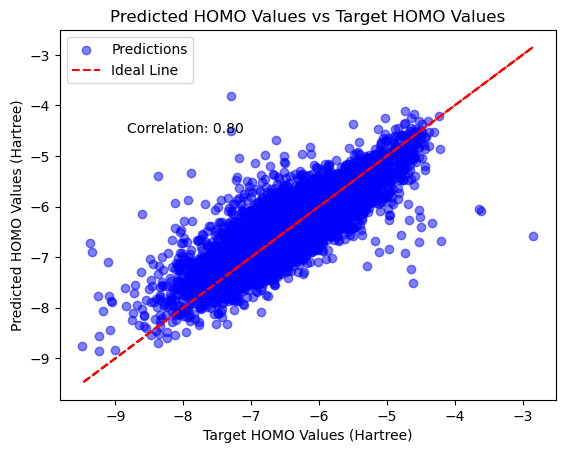

In [1]:
import os
import torch
import torch.nn as nn
import numpy as np
from Dataloader import DataLoaderQM9
from Model import PaiNN
from Training import Trainer
from Model import saveModel, mse, mae, test
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def test(model, test_set):
    model.eval()
    device = next(model.parameters()).device

    test_loss = 0.0
    
    with torch.no_grad():
        for batch_num, batch in enumerate(test_set):
            targets = batch["targets"][:, 2].to(device).unsqueeze(dim=-1)
            outputs = model(batch)
            loss = mae(outputs, targets)
            test_loss += loss.item()
    avg_test_loss = test_loss / (batch_num + 1)
    print(f"Average test MAE loss: {avg_test_loss}")

# Load the pre-trained model with map_location
best_model = PaiNN(r_cut=5, device=device).to(device)
best_model.load_state_dict(torch.load("./HOMO_best_PaiNNModel.pth", map_location='cpu'))
test(best_model, DataLoaderQM9(r_cut=5, batch_size=100).get_test())

# Plotting the predicted outputs vs target values
def plot_predictions(model, test_set):
    model.eval()
    device = next(model.parameters()).device

    predictions = []
    targets = []

    with torch.no_grad():
        for batch_num, batch in enumerate(test_set):
            target_batch = batch["targets"][:, 2].cpu().numpy()
            output_batch = model(batch).cpu().numpy()

            targets.extend(target_batch)
            predictions.extend(output_batch)

    plt.scatter(targets, predictions, alpha=0.5, color='blue', label='Predictions')
    plt.plot(targets, targets, color='red', linestyle='--', label='Ideal Line')  # Ideal line
    plt.xlabel("Target HOMO Values (Hartree)")
    plt.ylabel("Predicted HOMO Values (Hartree)")
    plt.title("Predicted HOMO Values vs Target HOMO Values")
    
    # Calculate and display correlation
    targets = np.array(targets)
    predictions = np.array(predictions) 
    correlation = np.corrcoef(targets.ravel(), predictions.ravel())[0, 1]   
    text_x = np.min(targets) + 0.1 * (np.max(targets) - np.min(targets))
    text_y = np.max(predictions) - 0.1 * (np.max(predictions) - np.min(predictions))
    plt.text(text_x, text_y, f'Correlation: {correlation:.2f}', ha='left', va='top')


    plt.legend()
    

# Plotting and saving the plot
plot_predictions(best_model, DataLoaderQM9(r_cut=5, batch_size=100).get_test())
plt.savefig("predicted_vs_target_plot_homo.png")
plt.show()

Average test MAE loss: 0.2238986460307172


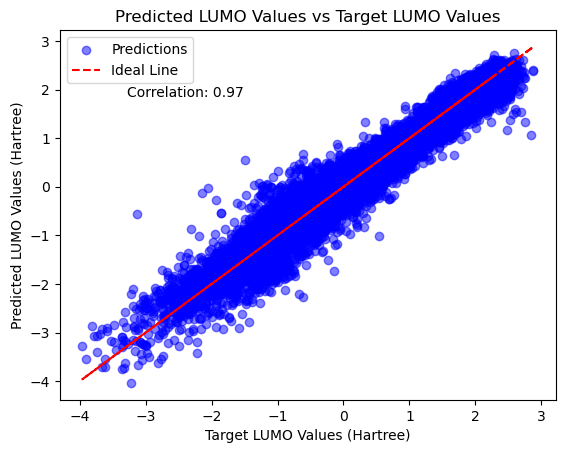

In [2]:
import os
import torch
import torch.nn as nn
import numpy as np
from Dataloader import DataLoaderQM9
from Model import PaiNN
from Training import Trainer
from Model import saveModel, mse, mae, test
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def test(model, test_set):
    model.eval()
    device = next(model.parameters()).device

    test_loss = 0.0
    
    with torch.no_grad():
        for batch_num, batch in enumerate(test_set):
            targets = batch["targets"][:, 3].to(device).unsqueeze(dim=-1)
            outputs = model(batch)
            loss = mae(outputs, targets)
            test_loss += loss.item()
    avg_test_loss = test_loss / (batch_num + 1)
    print(f"Average test MAE loss: {avg_test_loss}")

# Load the pre-trained model with map_location
best_model = PaiNN(r_cut=5, device=device).to(device)
best_model.load_state_dict(torch.load("./LUMO_best_model.pth", map_location='cpu'))
test(best_model, DataLoaderQM9(r_cut=5, batch_size=100).get_test())

# Plotting the predicted outputs vs target values
def plot_predictions(model, test_set):
    model.eval()
    device = next(model.parameters()).device

    predictions = []
    targets = []

    with torch.no_grad():
        for batch_num, batch in enumerate(test_set):
            target_batch = batch["targets"][:, 3].cpu().numpy()
            output_batch = model(batch).cpu().numpy()

            targets.extend(target_batch)
            predictions.extend(output_batch)

    plt.scatter(targets, predictions, alpha=0.5, color='blue', label='Predictions')
    plt.plot(targets, targets, color='red', linestyle='--', label='Ideal Line')  # Ideal line
    plt.xlabel("Target LUMO Values (Hartree)")
    plt.ylabel("Predicted LUMO Values (Hartree)")
    plt.title("Predicted LUMO Values vs Target LUMO Values")
    
    # Calculate and display correlation
    targets = np.array(targets)
    predictions = np.array(predictions) 
    correlation = np.corrcoef(targets.ravel(), predictions.ravel())[0, 1]   
    text_x = np.min(targets) + 0.1 * (np.max(targets) - np.min(targets))
    text_y = np.max(predictions) - 0.1 * (np.max(predictions) - np.min(predictions))
    plt.text(text_x, text_y, f'Correlation: {correlation:.2f}', ha='left', va='top')

    plt.legend()
    

# Plotting and saving the plot
plot_predictions(best_model, DataLoaderQM9(r_cut=5, batch_size=100).get_test())
plt.savefig("predicted_vs_target_plot_lumo.png")
plt.show()

Average test MAE loss: 0.23881523959509288


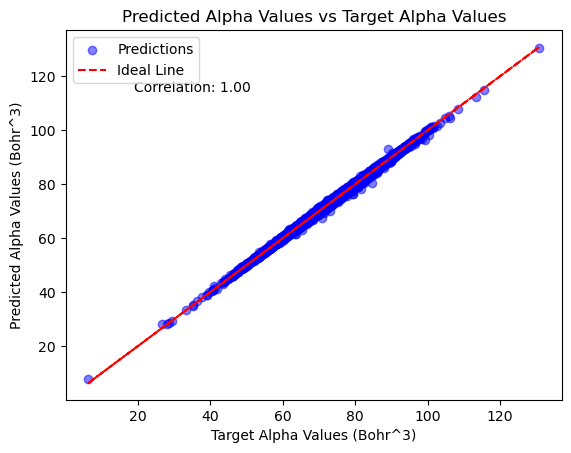

In [3]:
import os
import torch
import torch.nn as nn
import numpy as np
from Dataloader import DataLoaderQM9
from Model import PaiNN
from Training import Trainer
from Model import saveModel, mse, mae, test
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def test(model, test_set):
    model.eval()
    device = next(model.parameters()).device

    test_loss = 0.0
    
    with torch.no_grad():
        for batch_num, batch in enumerate(test_set):
            targets = batch["targets"][:, 1].to(device).unsqueeze(dim=-1)
            outputs = model(batch)
            loss = mae(outputs, targets)
            test_loss += loss.item()
    avg_test_loss = test_loss / (batch_num + 1)
    print(f"Average test MAE loss: {avg_test_loss}")

# Load the pre-trained model with map_location
best_model = PaiNN(r_cut=5, device=device).to(device)
best_model.load_state_dict(torch.load("./alpha_best_model.pth", map_location='cpu'))
test(best_model, DataLoaderQM9(r_cut=5, batch_size=100).get_test())

# Plotting the predicted outputs vs target values
def plot_predictions(model, test_set):
    model.eval()
    device = next(model.parameters()).device

    predictions = []
    targets = []

    with torch.no_grad():
        for batch_num, batch in enumerate(test_set):
            target_batch = batch["targets"][:, 1].cpu().numpy()
            output_batch = model(batch).cpu().numpy()

            targets.extend(target_batch)
            predictions.extend(output_batch)

    plt.scatter(targets, predictions, alpha=0.5, color='blue', label='Predictions')
    plt.plot(targets, targets, color='red', linestyle='--', label='Ideal Line')  # Ideal line
    plt.xlabel("Target Alpha Values (Bohr^3)")
    plt.ylabel("Predicted Alpha Values (Bohr^3)")
    plt.title("Predicted Alpha Values vs Target Alpha Values")
    
    # Calculate and display correlation
    targets = np.array(targets)
    predictions = np.array(predictions) 
    correlation = np.corrcoef(targets.ravel(), predictions.ravel())[0, 1]   
    text_x = np.min(targets) + 0.1 * (np.max(targets) - np.min(targets))
    text_y = np.max(predictions) - 0.1 * (np.max(predictions) - np.min(predictions))
    plt.text(text_x, text_y, f'Correlation: {correlation:.2f}', ha='left', va='top')
    
    plt.legend()
    

# Plotting and saving the plot
plot_predictions(best_model, DataLoaderQM9(r_cut=5, batch_size=100).get_test())
plt.savefig("predicted_vs_target_plot_alpha.png")
plt.show()

Average test MAE loss: 0.02447025061279308


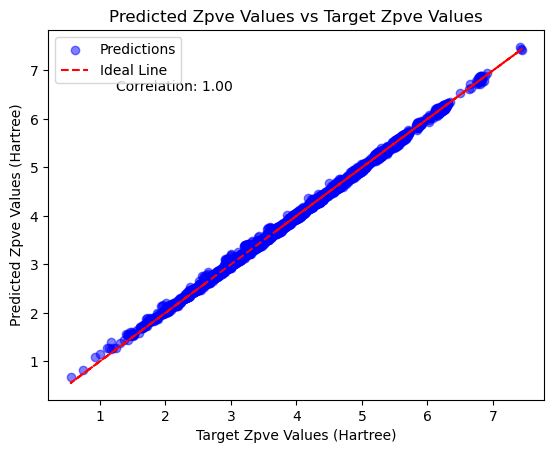

In [4]:
import os
import torch
import torch.nn as nn
import numpy as np
from Dataloader import DataLoaderQM9
from Model import PaiNN
from Training import Trainer
from Model import saveModel, mse, mae, test
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def test(model, test_set):
    model.eval()
    device = next(model.parameters()).device

    test_loss = 0.0
    
    with torch.no_grad():
        for batch_num, batch in enumerate(test_set):
            targets = batch["targets"][:, 6].to(device).unsqueeze(dim=-1)
            outputs = model(batch)
            loss = mae(outputs, targets)
            test_loss += loss.item()
    avg_test_loss = test_loss / (batch_num + 1)
    print(f"Average test MAE loss: {avg_test_loss}")

# Load the pre-trained model with map_location
best_model = PaiNN(r_cut=5, device=device).to(device)
best_model.load_state_dict(torch.load("./zpve_best_model.pth", map_location='cpu'))
test(best_model, DataLoaderQM9(r_cut=5, batch_size=100).get_test())

# Plotting the predicted outputs vs target values
def plot_predictions(model, test_set):
    model.eval()
    device = next(model.parameters()).device

    predictions = []
    targets = []

    with torch.no_grad():
        for batch_num, batch in enumerate(test_set):
            target_batch = batch["targets"][:, 6].cpu().numpy()
            output_batch = model(batch).cpu().numpy()

            targets.extend(target_batch)
            predictions.extend(output_batch)

    plt.scatter(targets, predictions, alpha=0.5, color='blue', label='Predictions')
    plt.plot(targets, targets, color='red', linestyle='--', label='Ideal Line')  # Ideal line
    plt.xlabel("Target Zpve Values (Hartree)")
    plt.ylabel("Predicted Zpve Values (Hartree)")
    plt.title("Predicted Zpve Values vs Target Zpve Values")
    
    # Calculate and display correlation
    targets = np.array(targets)
    predictions = np.array(predictions) 
    correlation = np.corrcoef(targets.ravel(), predictions.ravel())[0, 1]   
    text_x = np.min(targets) + 0.1 * (np.max(targets) - np.min(targets))
    text_y = np.max(predictions) - 0.1 * (np.max(predictions) - np.min(predictions))
    plt.text(text_x, text_y, f'Correlation: {correlation:.2f}', ha='left', va='top')

    plt.legend()
    

# Plotting and saving the plot
plot_predictions(best_model, DataLoaderQM9(r_cut=5, batch_size=100).get_test())
plt.savefig("predicted_vs_target_plot_zpve.png")
plt.show()


In [ ]:
import seaborn as sns
import pandas as pd

# Load the predictions for each model
predictions_homo = best_model_homo(DataLoaderQM9(r_cut=5, batch_size=100).get_test())
predictions_lumo = best_model_lumo(DataLoaderQM9(r_cut=5, batch_size=100).get_test())
predictions_alpha = best_model_alpha(DataLoaderQM9(r_cut=5, batch_size=100).get_test())

# Assuming 'targets' contain the true values for each feature
targets_homo = DataLoaderQM9(r_cut=5, batch_size=100).get_test()["targets"][:, 2].numpy()
targets_lumo = DataLoaderQM9(r_cut=5, batch_size=100).get_test()["targets"][:, 3].numpy()
targets_alpha = DataLoaderQM9(r_cut=5, batch_size=100).get_test()["targets"][:, 1].numpy()

# Create a DataFrame with predictions and targets
df = pd.DataFrame({
    'HOMO_Targets': targets_homo,
    'HOMO_Predictions': predictions_homo.flatten(),
    'LUMO_Targets': targets_lumo,
    'LUMO_Predictions': predictions_lumo.flatten(),
    'Alpha_Targets': targets_alpha,
    'Alpha_Predictions': predictions_alpha.flatten(),
})

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Predictions')
plt.show()
